# Problem Statement:
Build a model which can be used to predict in terms of a probability for each loan transaction,whether the customer 
will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter. 
for the year 2016 and the circle UPW as the dataset is presented for the year 2016 and for the Telecom circle USW.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

- Importing Neccessary libraries for model preparation -Numpy, Pandas, Matplotlib & Seaborn for plots
- 5 ML algo used and inported from  sklearn library at once - Logistic,SVC,Random Forest Classifier, Decision tree classifier, KNN
- As the metrics is common for all classification problems so imported common metrics all at once.
- Following are the Metrics used for this project(Confusion Metrics, Accuracy Score, Classification Report) from Sklearn metrics module

In [3]:
microfinance = pd.read_csv('Data file.csv')

In [4]:
df = pd.DataFrame(microfinance)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20/7/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10/8/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19/8/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22/6/2016


 -New dataframe for easy analysis.
 
 -The datset has objects, float & Int data types.
 
 -label is a binary class target variable.

# Initial Analysis

In [5]:
df.shape

(209593, 37)

- The dataset has 209593 rows and 37 Columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

- There are 36 variable with Object,Float & int data types.
- There are 21 variable with float data type, 3 Object and 13 int data types
- index 1 = label and index 36 = pdate.
- index 0 with Column Unnammed is dropped later.

In [7]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [8]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [9]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

- Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, 
- While, Label ‘0’ indicates that the loan has not been payed

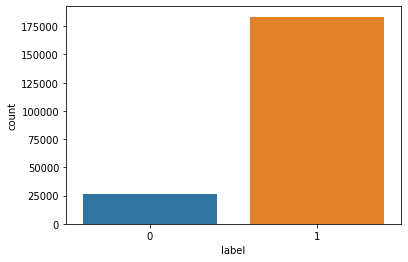

In [10]:
sns.countplot(df['label'])

- Number of customer who is repaying the loan is high which is represented by label class 1
- There are less customer who are defaulter as compared to Non Defaulter.
- The target col class is not balanced which needs to be balanced.
- The Target col is balanced with Upsampling method later before building the model.

In [11]:
df['pdate_year'] = pd.DatetimeIndex(df['pdate']).year

In [12]:
df['pdate_month'] = pd.DatetimeIndex(df['pdate']).month

In [13]:
df['pdate_day'] = pd.DatetimeIndex(df['pdate']).day

In [14]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [15]:
df['pdate_year'].value_counts()

2016    209593
Name: pdate_year, dtype: int64

In [16]:
df.drop(['pdate','Unnamed: 0','pdate_year','pcircle'],axis=1,inplace=True)

- The pdate column is dropped after it got converted into new three column as pdate_year,pdate_month & pdate_month.
- the dataset is representing for only one circle  that is UPW hence dropped.
- The year column is also dropped as the data is reflecting for only one year that is year 2016.
- The unnamed col is dropped which is non relevant.

In [17]:
numerics_var = ['float64', 'int64']
numeric_df = df.select_dtypes(include=numerics_var)
objects_df = df.select_dtypes(exclude=numerics_var)

- The dataframe is divided into object and numeric type for better analysis.

In [18]:
numeric_df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


In [19]:
objects_df

,msisdn
0,21408I70789
1,76462I70374
2,17943I70372
3,55773I70781
4,03813I82730
...,...
209588,22758I85348
209589,95583I84455
209590,28556I85350
209591,59712I82733


- The object datframe has only one object type variable which is msisdn.
- Where 'msisdn' is mobile number of user's which is unique for each user.

# Encoding : Labelencoder

In [20]:
# categorical variable encoding
cat_vars_list = objects_df.columns.tolist()
## Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

- The object col is label encoded and merged with dataframe 'df'.

In [21]:
df.shape

(209593, 36)

- After dropping non relevant column and  label encoder we have 36 column and 209593 rows.

In [22]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


-  the object col 'msisdn' column is lableencode with unique value for each mobile user.

# Missing Value Detection:

In [23]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate_month             0
pdate_day               0
dtype: int64

-  There is no missing value present in the dataset.

# Boxplot Outliers Detection:

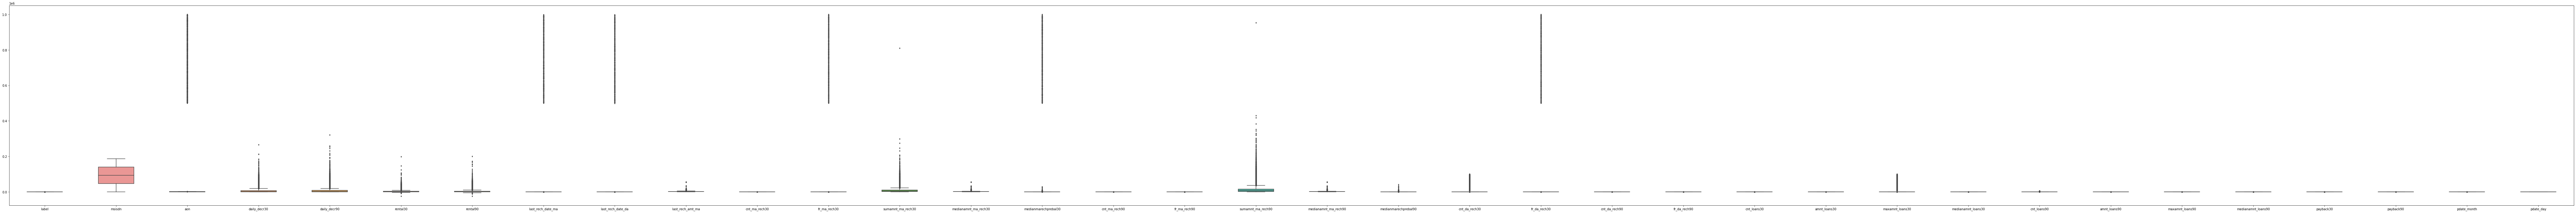

In [24]:
fig, ax =plt.subplots(figsize=(150,12))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

-  There is huge outliers present in many variables in the dataset.

# Skewness Detection:

In [25]:
df.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

- Most of the variable have right skewed data as seen from the output of df.skew() command.
- The hist plot also shows that data is not normal and has positive skewness.
- Disstplot also shows the presence of positive skewness in data for almost all variables.
- The skewness is removed by power tranform method later before building model.

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb90dce6b90>,
      dtype=object)

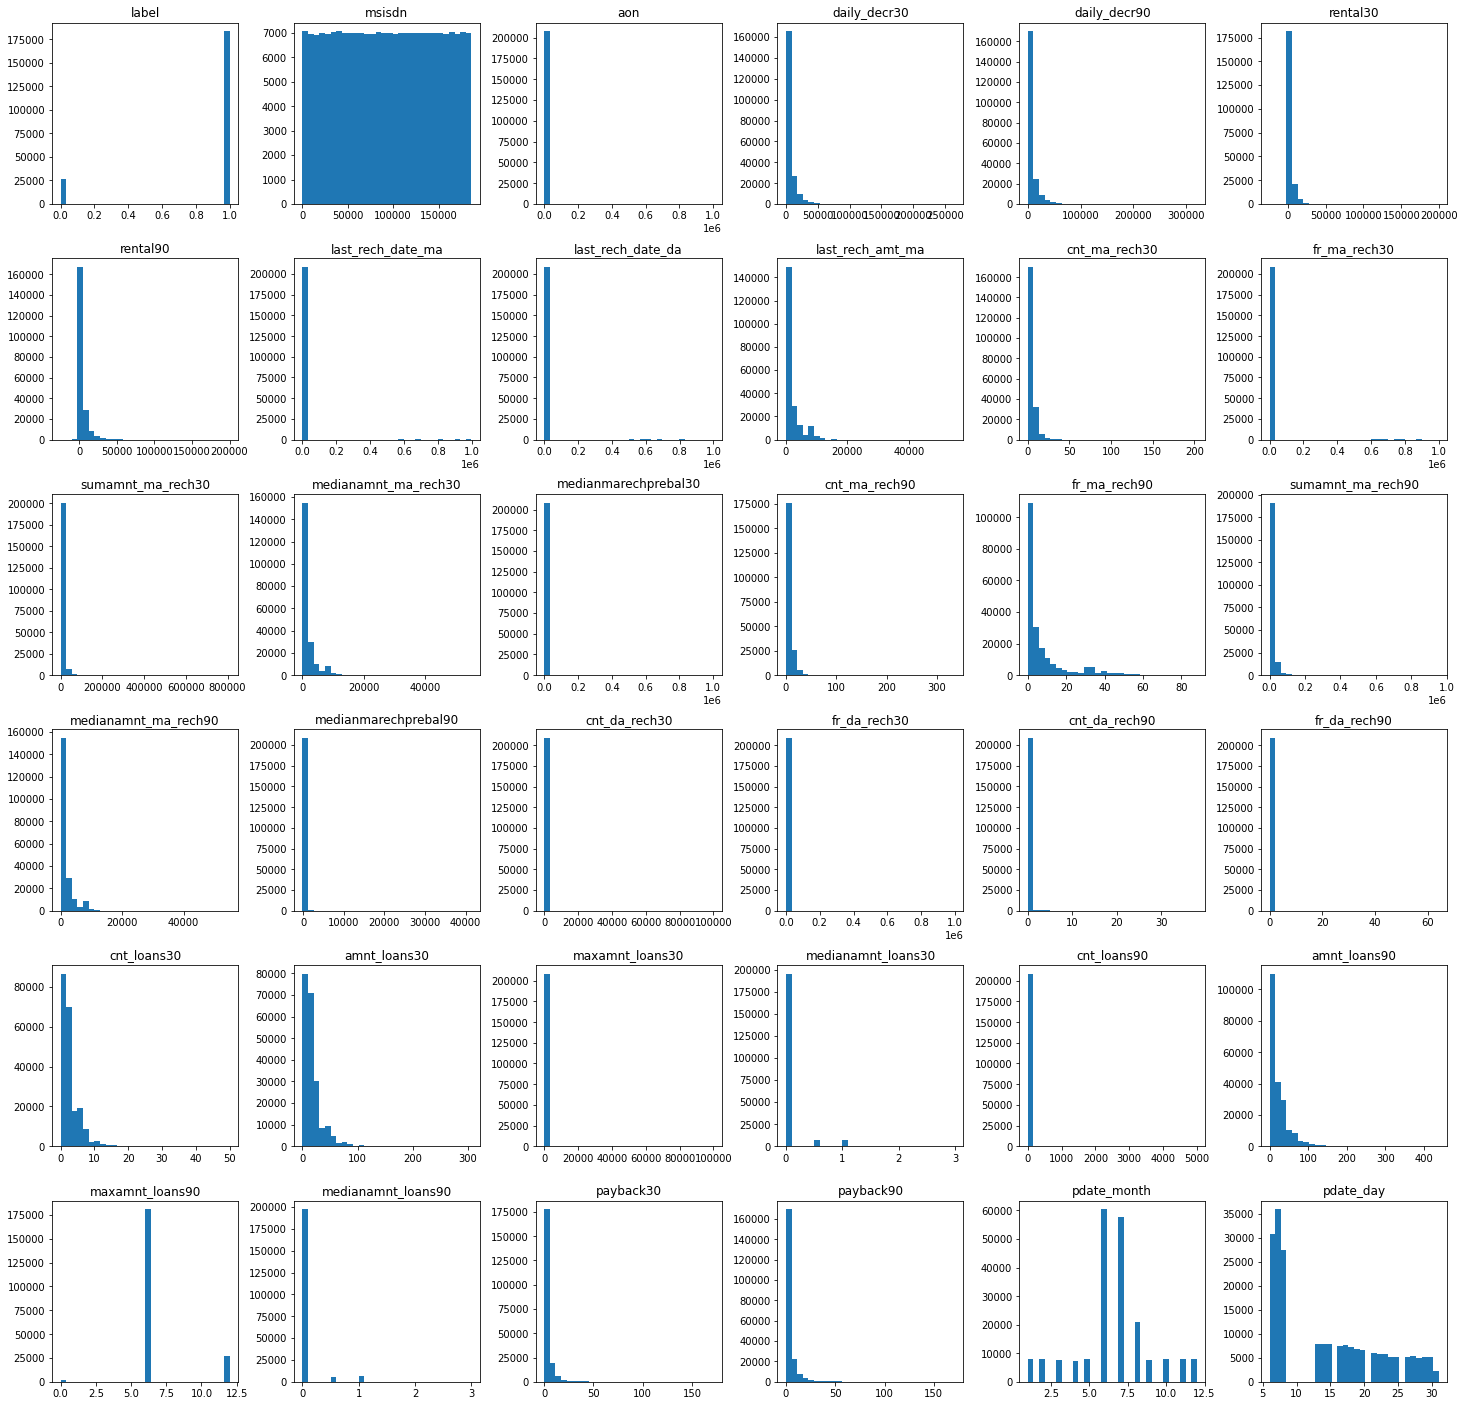

In [26]:
df.hist(grid=False, figsize=(25,25), bins=30)

- Most of the variable have right skewed data as seen from the output of df.skew() command.
- The hist plot also shows that data is not normal and has positive skewness.
- Disstplot also shows the presence of positive skewness in data for almost all variables.
- The skewness is removed by power tranform method later before building model.

### Disstplot:

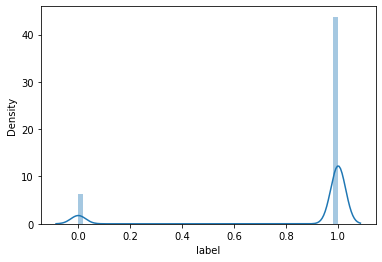

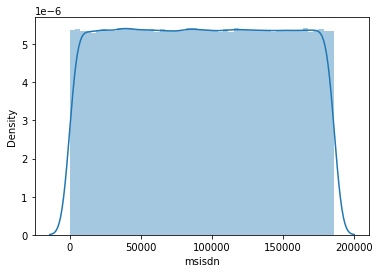

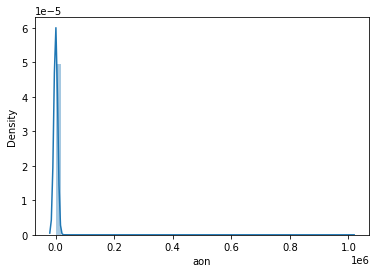

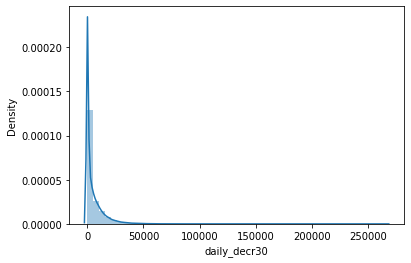

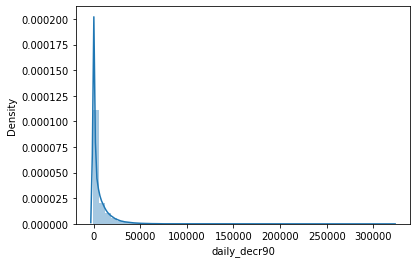

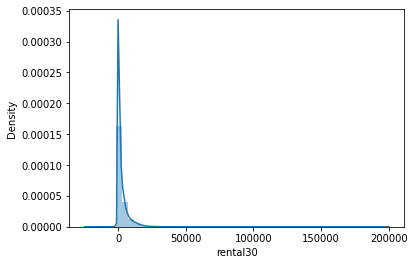

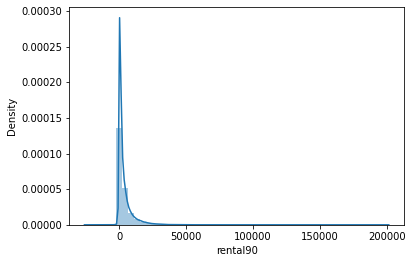

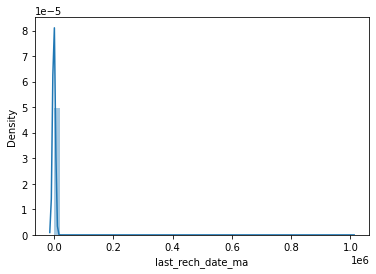

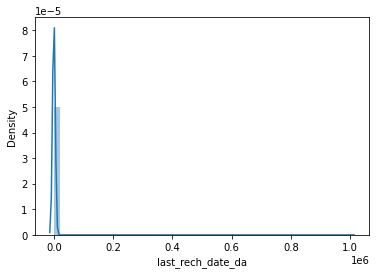

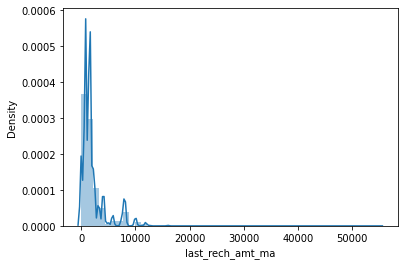

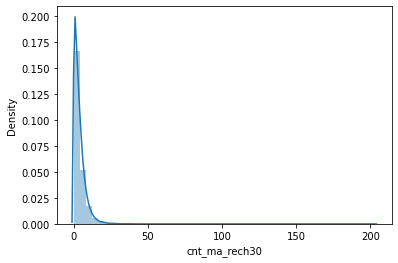

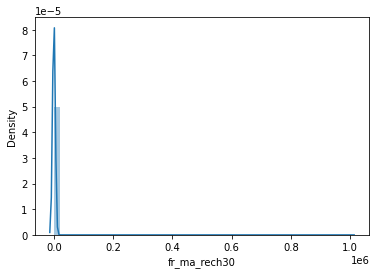

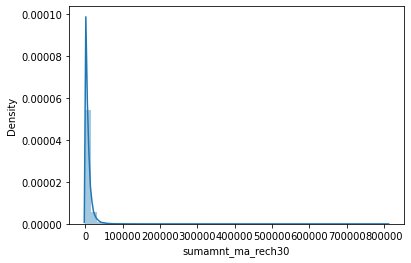

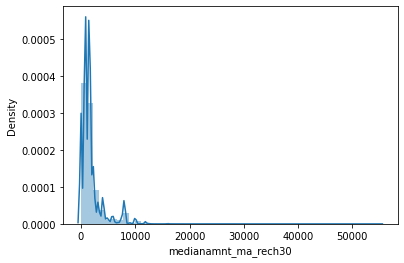

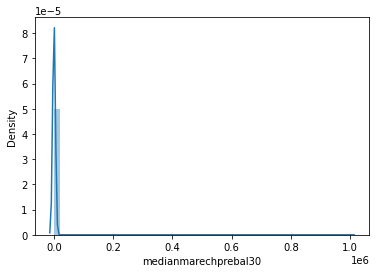

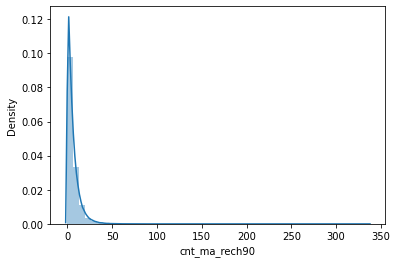

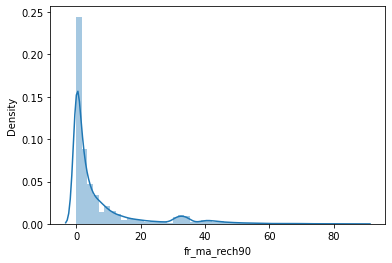

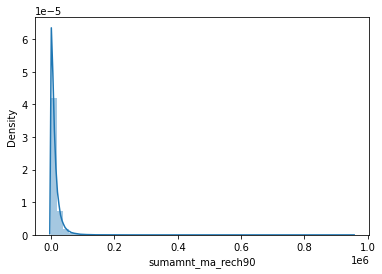

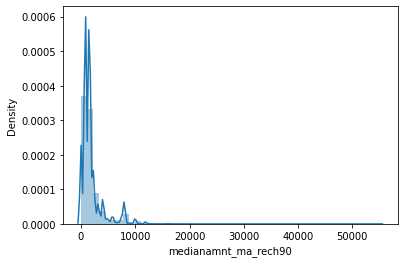

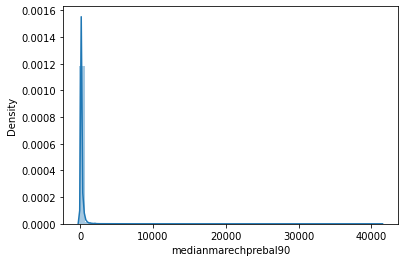

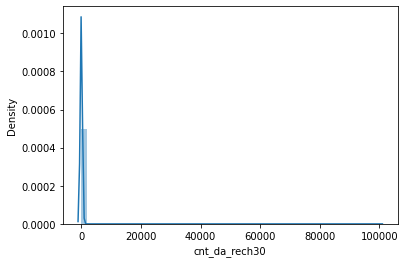

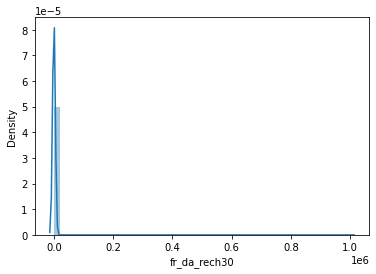

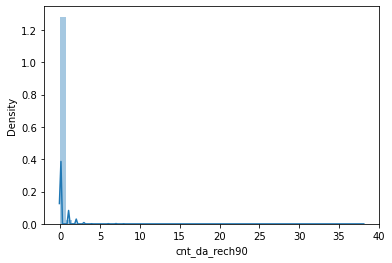

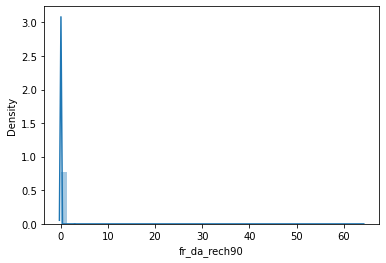

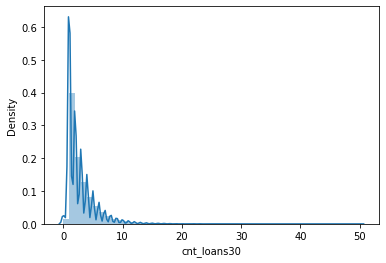

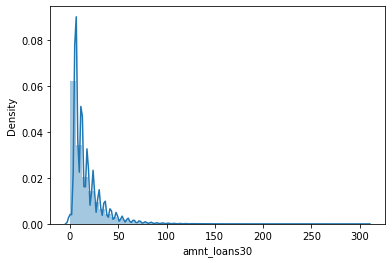

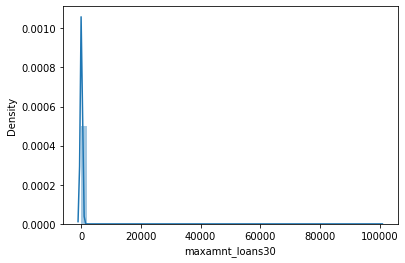

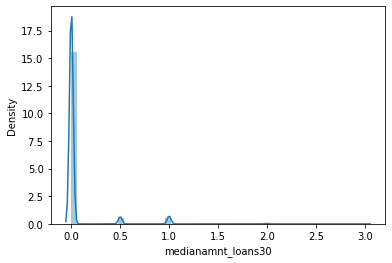

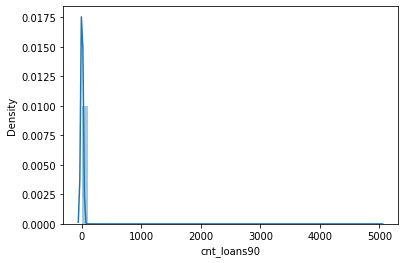

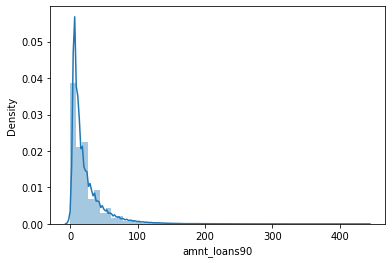

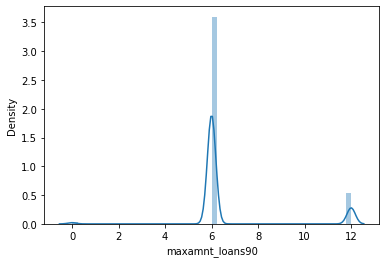

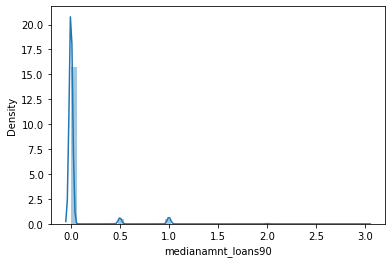

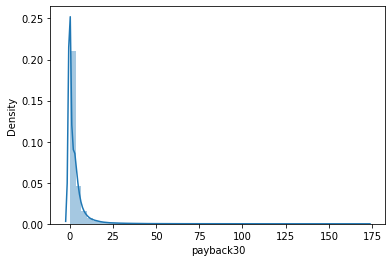

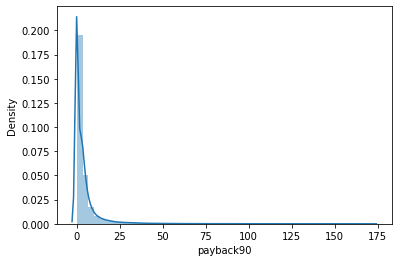

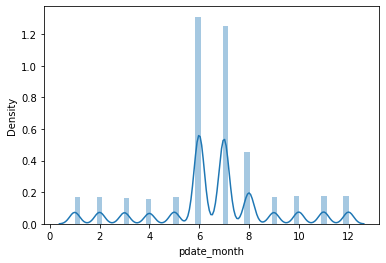

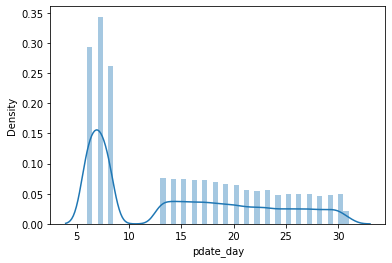

In [27]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

- Most of the variable have right skewed data as seen from the output of df.skew() command.
- The hist plot also shows that data is not normal and has positive skewness.
- Disstplot also shows the presence of positive skewness in data for almost all variables.
- The skewness is removed by power tranform method later before building model.

## Correlation 

In [28]:
corr = df.corr()
corr

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day
label,1.000000,0.001976,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.005093,0.020168
msisdn,0.001976,1.000000,0.000566,0.000717,0.000950,-0.001404,-0.000691,-0.000928,0.001400,-0.002368,0.000617,-0.001804,0.001094,0.000668,-0.000238,-0.001859,-0.004413,-0.000936,-0.000625,-0.000615,-0.001720,-0.000241,0.004595,-0.002233,0.001765,0.002170,-0.000755,0.000986,0.001859,-0.000155,0.003286,0.001210,0.002922,0.002671,0.001673,0.001839
aon,-0.003785,0.000566,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000906,0.000259
daily_decr30,0.168298,0.000717,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.101704,0.024892
daily_decr90,0.166150,0.000950,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,0.122772,-0.009150
rental30,0.058085,-0.001404,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.073416,0.050964
rental90,0.075521,-0.000691,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.099160,0.019945
last_rech_date_ma,0.003728,-0.000928,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,-0.000924,0.000758
last_rech_date_da,0.001711,0.001400,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,-0.000530,0.000660
last_rech_amt_ma,0.131804,-0.002368,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.023358,0.032715


- daily_decr30 & daily_decr90 shows correlation with sumaamnt_ma_rech90,cnt_ma_rech90, sumaamnt_ma_rech30,rental30,rental90 andamnt_loans90
- rental30 & rental90 shows corr with daily_decr30 & daily_decr90.
- last_rech_date_ma shows high corr with meadiamnt_ma_rech90,sumaamnt_ma_rech90,meadiamnt_ma_rech30 sumaamnt_ma_rech30.
- cnt_ma_rech30 shows corr amnt_loans90,amnt_loans30,cnt_loans30 cnt_ma_rech90 summant_ma_rech90,summant_ma_rech30
- Similar observation can be drawn for remainng variables.
- There are many variables which shows high positive correlation with each other.

## Heatmap

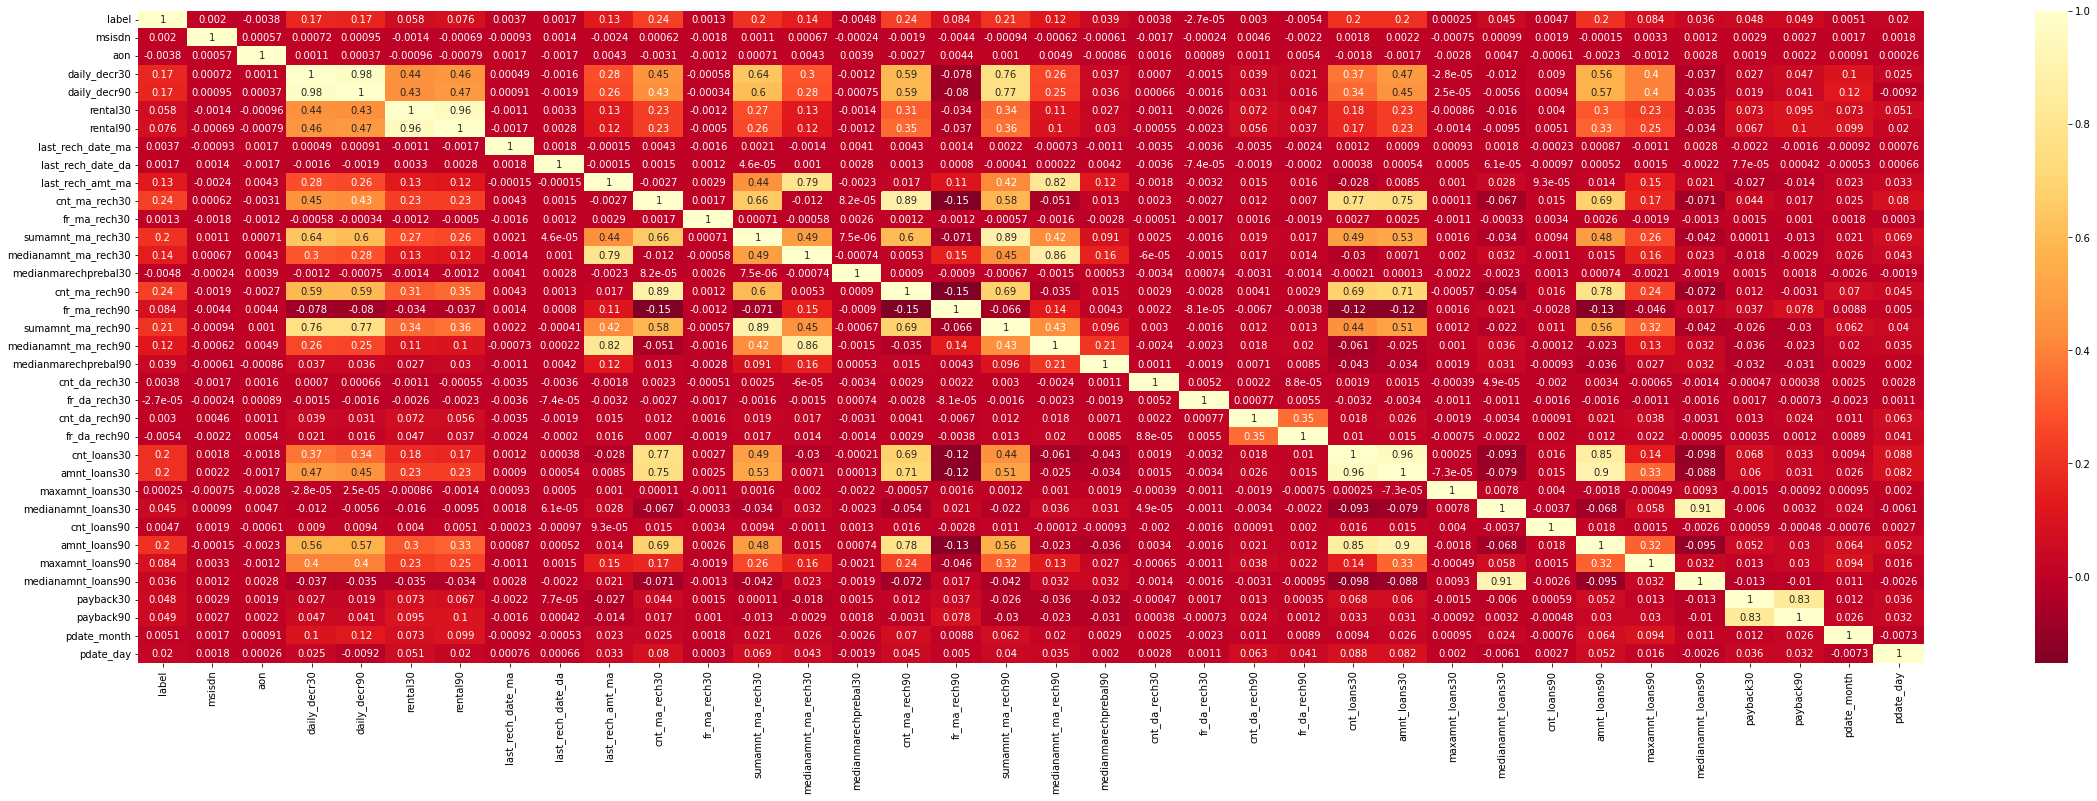

In [29]:
plt.figure(figsize=(40,12))
sns.heatmap(corr,cmap='YlOrRd_r', annot=True)

- daily_decr30 & daily_decr90 shows correlation with sumaamnt_ma_rech90,cnt_ma_rech90, sumaamnt_ma_rech30,rental30,rental90 andamnt_loans90
- rental30 & rental90 shows corr with daily_decr30 & daily_decr90.
- last_rech_date_ma shows high corr with meadiamnt_ma_rech90,sumaamnt_ma_rech90,meadiamnt_ma_rech30 sumaamnt_ma_rech30.
- cnt_ma_rech30 shows corr amnt_loans90,amnt_loans30,cnt_loans30 cnt_ma_rech90 summant_ma_rech90,summant_ma_rech30
- Similar observation can be drawn for remainng variables.
- There are many variables which shows high positive correlation with each other.


# VIF : Multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [32]:
vif_calc()

    VIF Factor              features
0     7.743454                 label
1     3.690174                msisdn
2     1.011320                   aon
3    39.690972          daily_decr30
4    42.922041          daily_decr90
5    18.376812              rental30
6    18.928700              rental90
7     1.004898     last_rech_date_ma
8     1.004885     last_rech_date_da
9     6.039993      last_rech_amt_ma
10   28.192810         cnt_ma_rech30
11    1.004852          fr_ma_rech30
12   20.069435     sumamnt_ma_rech30
13    8.978222  medianamnt_ma_rech30
14    1.004954  medianmarechprebal30
15   28.815576         cnt_ma_rech90
16    1.481656          fr_ma_rech90
17   23.351195     sumamnt_ma_rech90
18   10.097435  medianamnt_ma_rech90
19    1.132065  medianmarechprebal90
20    1.004080         cnt_da_rech30
21    1.004859          fr_da_rech30
22    1.161556         cnt_da_rech90
23    1.143065          fr_da_rech90
24   42.554629           cnt_loans30
25   52.896467          amnt_loans30
2

-  The dataset has high multicollinearity issue as can see there are many indpendent variables are having VIF values.
-  PCA is used to remove multicollineairty isssue with the datset.
-  PCA is also help to avoid overfitting of the model.

In [33]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate_month', 'pdate_day'],
      dtype='object')

# Removing Outliers:

In [34]:
def outlier(x):
    high=0
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3-q1
    low = q1-1.5*iqr
    high += q3+1.5*iqr
    outlier = (x.loc[(x < low) | (x > high)])
    return(outlier)

In [35]:
outlier(df['aon']).count()

3607

In [36]:
outlier(df['daily_decr30']).count()

16350

In [37]:
outlier(df['daily_decr90']).count()

18187

- All the variables above has presence of hughe outliers and above command can be executed to know the exact figure.
- I have checked outliers for only three variables 'aon', 'daily_rech30' and 'daily_rech90'.
- I have set quantile method in outliers function to check the presence of outliers in above variables.
- I have used boxplot to know the presence of outliers which i missed to execute in this ipynb file as the model was hughe time for execution.

# Removing Outliers For each column through Quantile method.

In [38]:
q1 =df['aon'].quantile(.25)
q3 = df['aon'].quantile(.75)
iqr = q3-q1
df_new = df[~((df['aon'] < (q1 - 1.5 *iqr)) | (df['aon'] > (q3+
1.5 * iqr)))]

In [39]:
q1 =df['daily_decr30'].quantile(.25)
q3 = df['daily_decr30'].quantile(.75)
iqr = q3-q1
df_new = df[~((df['daily_decr30'] < (q1 - 1.5 *iqr)) | (df['daily_decr30']> (q3+
1.5 * iqr)))]

In [ ]:
q1 =df['daily_decr90'].quantile(.25)
q3 = df['daily_decr90'].quantile(.75)
iqr = q3-q1
df_new = df[~((df['daily_decr90'] < (q1 - 1.5 *iqr)) | (df['daily_decr90'] > (q3+
1.5 * iqr)))]

- I have used quantile method to remove outliers.
- I first used z-score to remove outliers but the percentage data loss was greater then 22% then I switched to quantile method.
- I have removed outliers from two varialbles 'aon' and 'daily_decr30' to prevent data loss.
- All above Variables shows presence of huge outliers 

In [40]:
df.shape

(209593, 36)

In [41]:
df_new.shape

(193243, 36)

In [42]:
Data_loss=((209593-193243)/209593)*100

In [43]:
Data_loss 

7.800833043088271

- By removing outliers from two variables 'aon' and 'daily_rech90', the data loss is less then 8% as expected.
- The remaining outliers is averaged out by tree based algorithm.
- Decision tree and randomforest are not much affected by the presence of outliers.

In [45]:
x=df.drop("label",axis=1)
y=df["label"]

In [46]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

# Class Imbalance : Upsampling Target Variables.

In [47]:
from sklearn.utils import resample

In [48]:
x = pd.concat([x, y], axis=1)

In [49]:
label1 = x[x.label==1]
label0 = x[x.label==0]

- label1 =  Non Deafulter
- label0 =  Defaulter 

In [50]:
# upsample minority
dia_upsampled = resample(label0,
                          replace=True, # sample with replacement
                          n_samples=len(label1),   # match number in majority
                          random_state=27)  # reproducible results

In [51]:
upsampled = pd.concat([label1, dia_upsampled])

In [52]:
upsampled.label.value_counts()

1    183431
0    183431
Name: label, dtype: int64

In [53]:
x=upsampled.drop("label",axis=1)
y=upsampled["label"]

In [54]:
x.shape

(366862, 35)

In [55]:
y.shape

(366862,)

-  As we already saw that target column class is not balanced well.
-  Target Column class is balanced with upsample method.
-  The class of target column label 1 & 0 is  equally balanced.
-  The benefit of balancing target column so that we will get proper prediction for low value class which is zero in this case.
-  After balancing defaulter & Non defaulter of loan repayment is forcefully made same in order to get correct prediction for lower value class.
- upsample dataframe is divided into x-independent variables and y-target variable or dependent varaible.

# Removing Skewness : Power Transform

In [56]:
from sklearn.preprocessing import power_transform # Importing power tranform
x=power_transform(x,method='yeo-johnson') 

In [57]:
x = pd.DataFrame(x)

In [58]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,0.905989,0.062236,1.386578,1.332594,0.425318,0.254804,0.210680,-0.073913,1.482310,-0.326441,-0.875614,0.630638,1.521403,0.041495,-0.550314,-0.961053,0.378491,1.590125,0.093163,-0.135841,-0.08889,-0.150334,-0.068633,-0.712851,0.258807,1.434801,-0.239215,-0.813462,0.140613,2.815756,-0.224997,-0.711941,-0.771458,1.467843,-0.764933
1,-1.075368,-0.005037,0.318564,0.300030,-0.304634,-0.342825,-0.017138,-0.073913,0.374120,-0.326441,-0.875614,0.023771,0.513558,0.044917,-0.550314,-0.961053,-0.209102,0.413210,0.116863,-0.135841,-0.08889,-0.150334,-0.068633,-0.712851,-0.693905,-0.101781,-0.239215,-0.813462,-0.775710,-0.237398,-0.224997,-0.711941,-0.771458,0.595909,0.762988
2,0.293585,-0.160248,-0.770685,-0.765896,-0.550269,-0.546173,0.336725,-0.073913,0.065137,-1.353032,-0.875614,-1.500859,-1.535135,-0.030206,-0.550314,-0.961053,-0.385768,0.088664,-0.237818,-0.135841,-0.08889,-0.150334,-0.068633,0.424206,0.258807,-0.101781,-0.239215,0.238959,0.140613,-0.237398,-0.224997,-0.711941,-0.771458,-0.265340,-1.266943
3,-1.829825,0.136548,-0.379281,-0.380732,-0.246075,-0.294620,0.008439,-0.073913,0.668643,1.305485,0.603319,1.368618,0.785439,0.016487,1.053420,0.324939,1.212853,0.913062,-0.032487,-0.135841,-0.08889,-0.150334,-0.068633,1.822179,1.797500,-0.101781,-0.239215,1.545404,1.479189,-0.237398,-0.224997,1.146577,0.926366,-0.265340,1.020254
4,-0.354667,0.008490,0.515938,0.492319,-0.473991,-0.479323,-0.048129,-0.073913,0.374120,0.807877,1.443634,0.663146,0.513558,0.001604,1.053420,-0.961053,0.768454,0.413210,0.069606,-0.135841,-0.08889,-0.150334,-0.068633,0.987452,0.787250,-0.101781,-0.239215,0.763121,0.620621,-0.237398,-0.224997,1.637111,1.464416,-1.941635,-0.998918


In [59]:
x.shape

(366862, 35)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8fce2b190>,
      dtype=object)

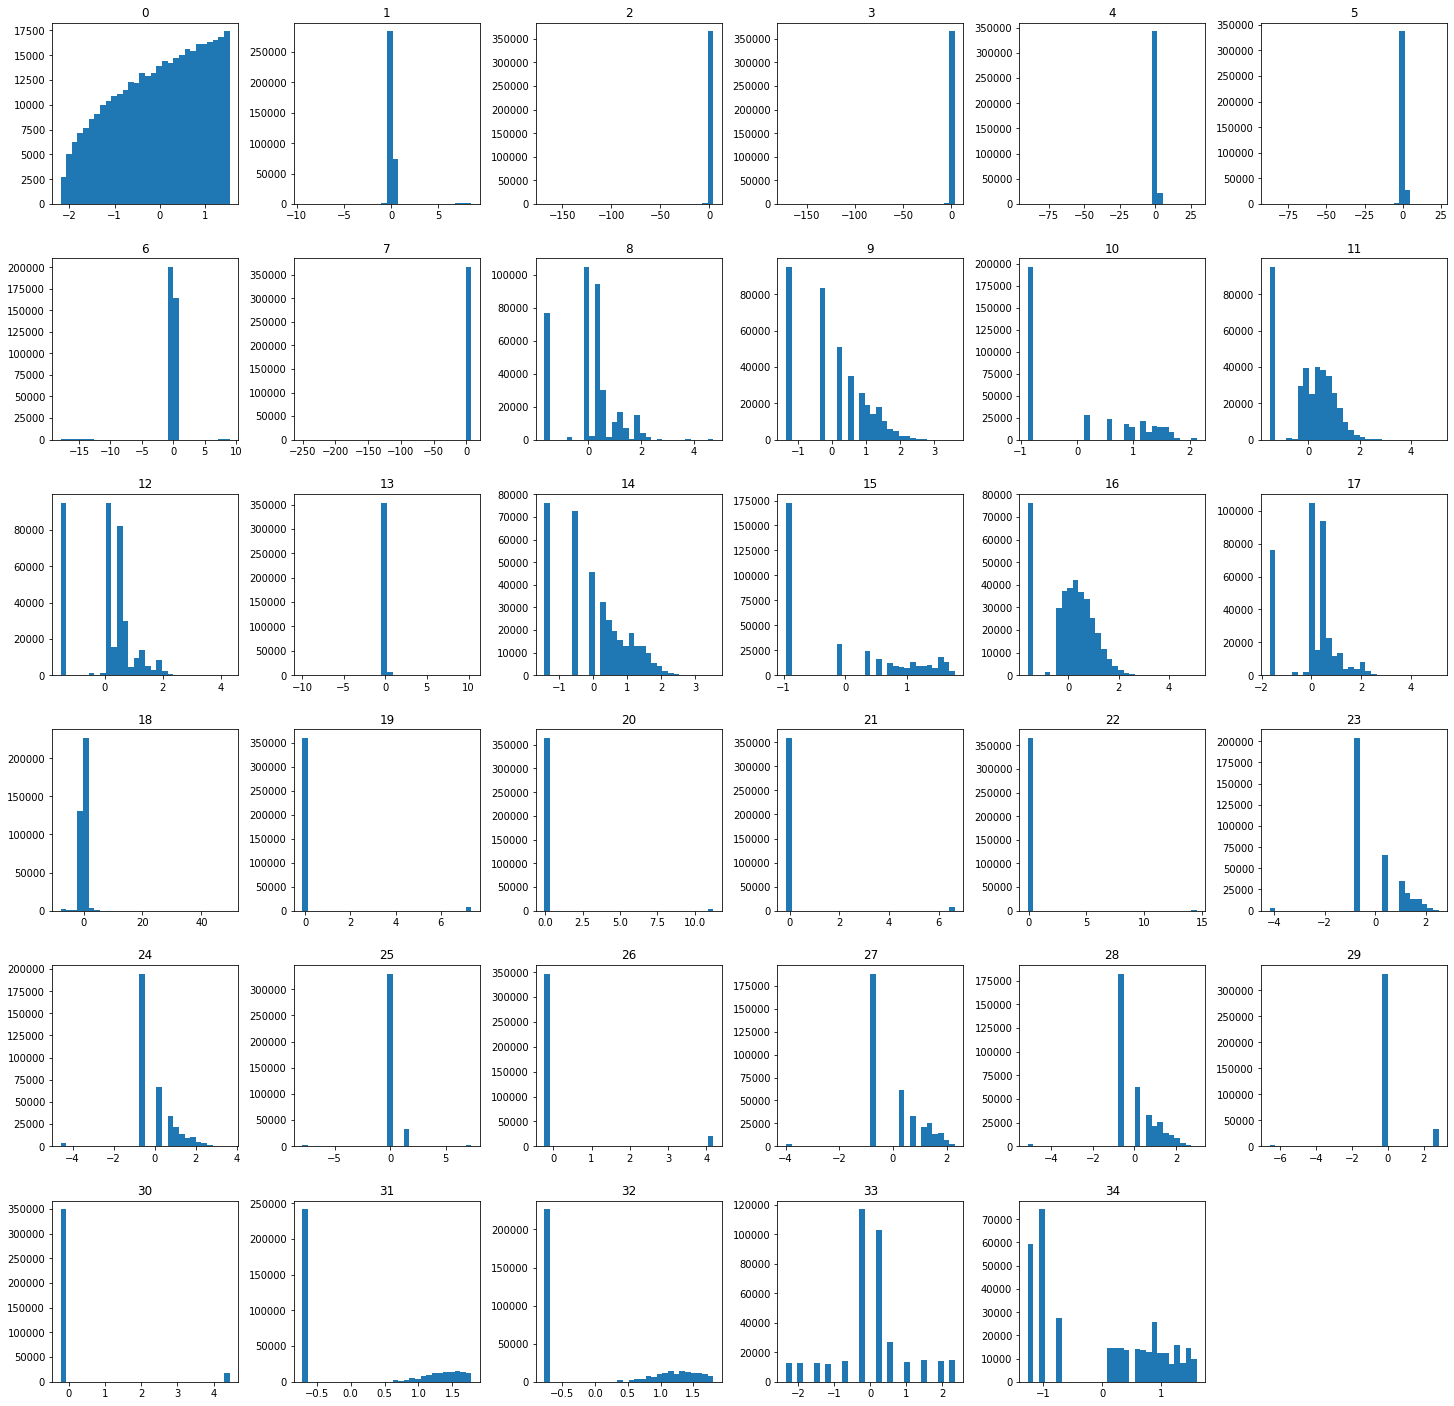

In [60]:
x.hist(grid=False, figsize=(25,25), bins=30)

## Disstplot

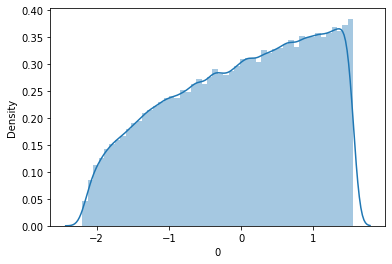

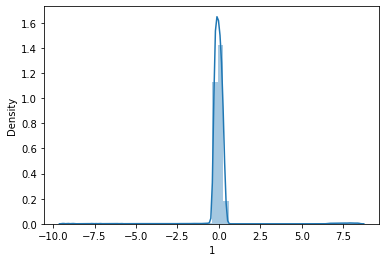

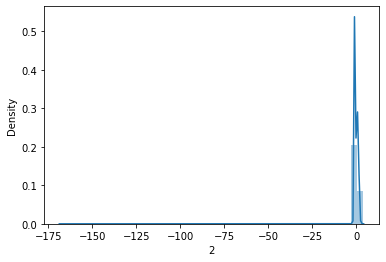

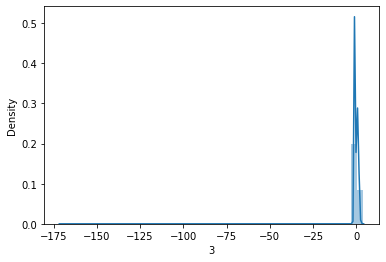

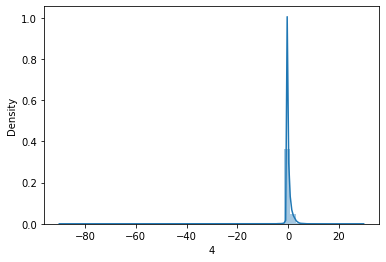

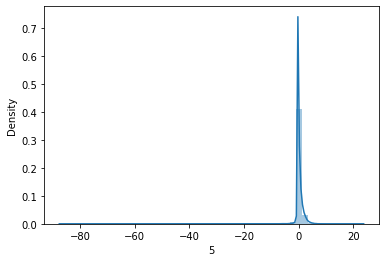

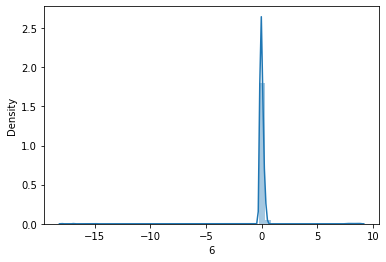

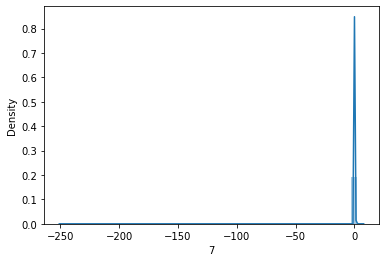

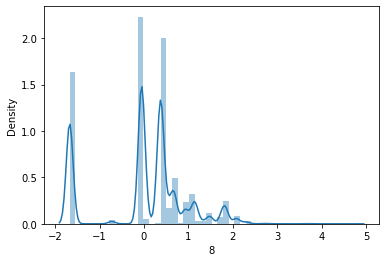

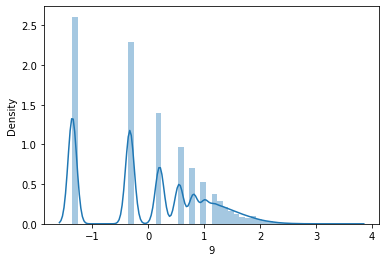

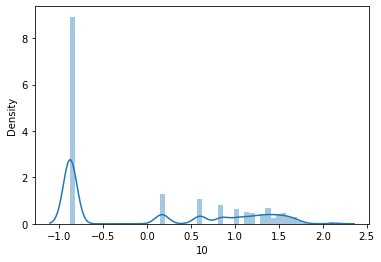

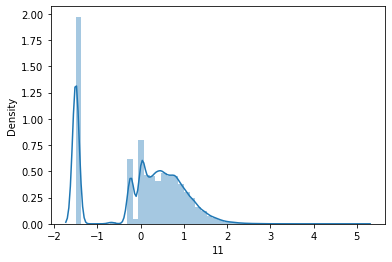

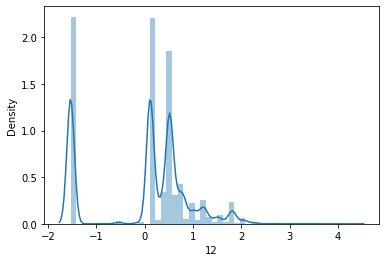

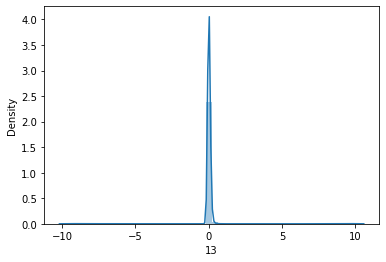

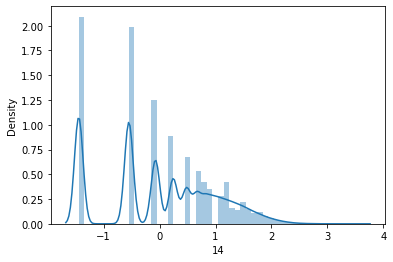

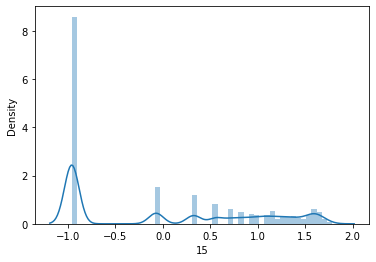

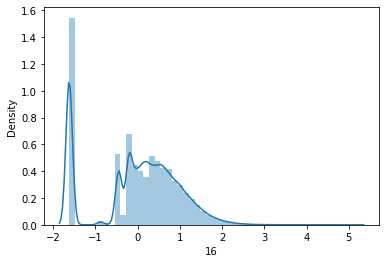

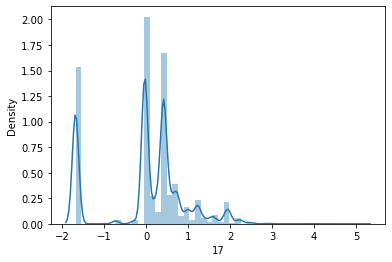

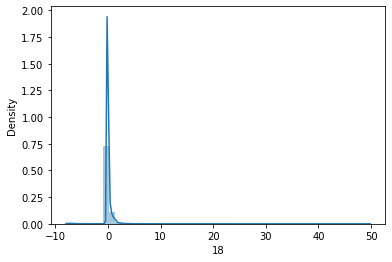

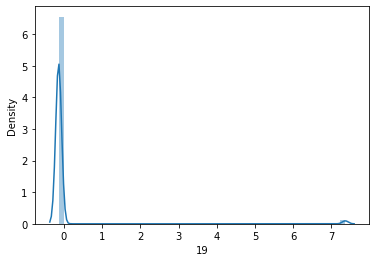

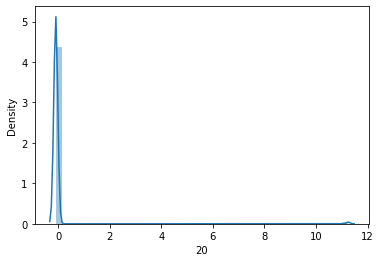

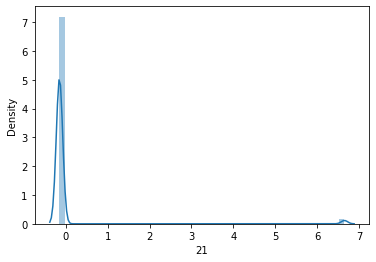

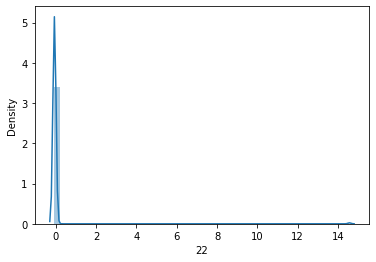

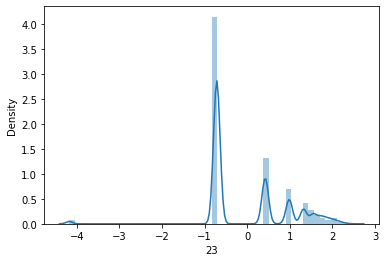

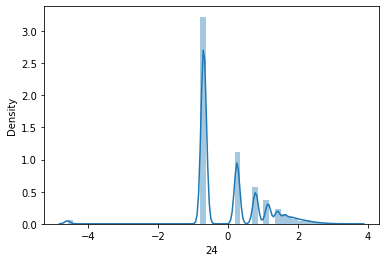

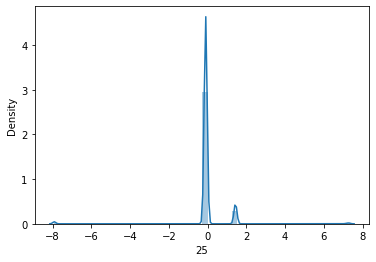

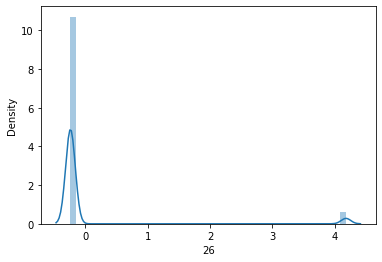

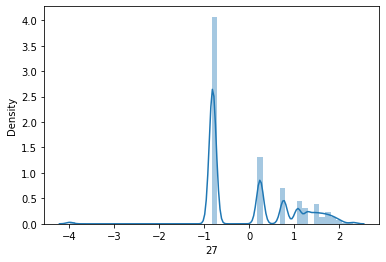

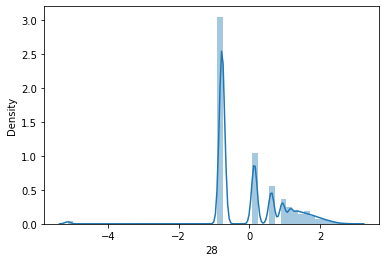

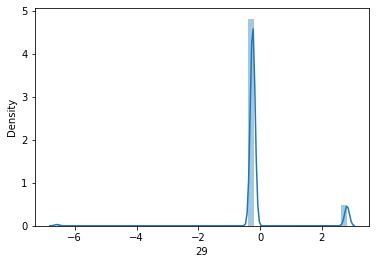

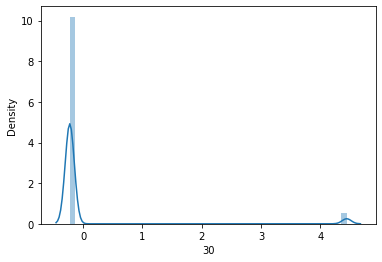

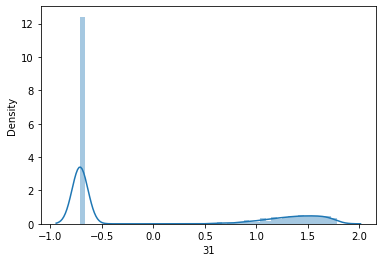

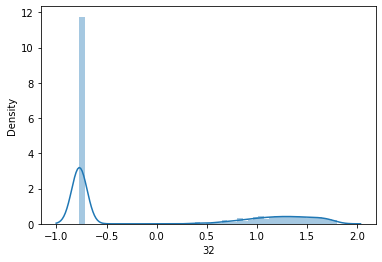

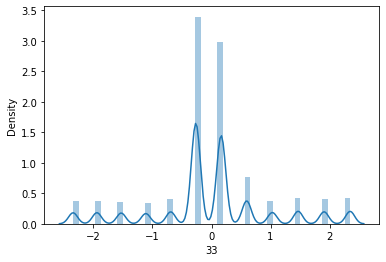

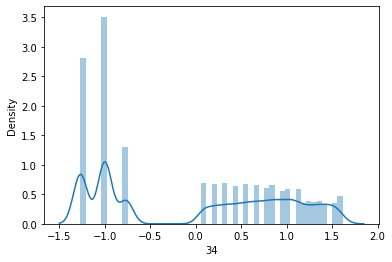

In [61]:
for i in x:
    plt.figure()
    sns.distplot(x[i])

In [62]:
x.skew()

0      -0.288991
1       1.839084
2     -13.430857
3     -14.140242
4      -1.028118
5      -0.955387
6      -7.555623
7    -137.522536
8      -0.355477
9       0.057868
10      0.449647
11     -0.374692
12     -0.420450
13     -0.572272
14      0.049950
15      0.342882
16     -0.324762
17     -0.366644
18      8.109599
19      7.225718
20     11.161036
21      6.501528
22     14.501665
23      0.006285
24     -0.094624
25     -2.280926
26      3.941135
27      0.234400
28     -0.105459
29      0.398013
30      4.219526
31      0.737815
32      0.597547
33      0.062002
34      0.022987
dtype: float64

- The skewness is removed by Power traform - yeo-johnson method.
- yeo-johnson is used to remove boith left/negative and right/positive skeweness in data.
- The skewness is removed as we can see in hist plot and disst plot where the data falls in normal range +0.5 to -0.5

# Scaling: Standard Scaler:

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[ 0.90598868,  0.06223575,  1.38657797, ..., -0.77145761,
         1.46784334, -0.76493287],
       [-1.07536808, -0.00503718,  0.31856365, ..., -0.77145761,
         0.59590895,  0.76298778],
       [ 0.29358482, -0.16024785, -0.7706851 , ..., -0.77145761,
        -0.26533985, -1.26694261],
       ...,
       [-0.32472489, -0.01392752,  0.02127233, ..., -0.77145761,
        -2.34546845, -0.99891753],
       [-1.14650082,  0.18287744, -0.51546316, ..., -0.77145761,
        -0.26533985,  1.44047873],
       [-0.98512154, -0.22253903,  0.4889656 , ..., -0.77145761,
         0.16379946,  1.02025435]])

- daily_decr30, daily_decr9 rental30,rental90, last_rech_amt_ma, sumamnt_ma_rech30, medianamnt_ma_rech30 & medianmarechprebal90 shows higher data value as compared to other variables.
- Standard Scaler used to make all the higher data value present in above variables to similar range with other variables

# Dimension Reduction Technique : PCA

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
x = pca.fit_transform(x)

- PCA is used as there are many input variables as well there are many features which are multicollinear as seen in VIF output.
- PCA will help with less computation time.
- PCA is set to n_components = 0.95 means it will select all the uncorrelated PCA features which explain 95% variance 

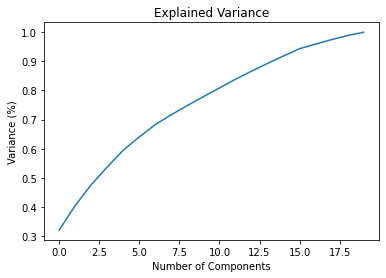

In [66]:
import matplotlib.pyplot as plt
import seaborn as sna
pca = PCA()
principalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [67]:
pca = PCA(n_components=17)
new_data = pca.fit_transform(x)
principal_x = pd.DataFrame(new_data,columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17'])

In [68]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,PC-16,PC-17
0,-1.133890,-1.321314,-0.598100,-2.107149,0.883572,3.158174,-2.090347,-1.556789,-0.236446,0.083170,0.876898,-0.627141,0.028337,0.629954,-0.037404,-0.089778,-0.936560
1,1.383749,-1.416429,-0.010495,-0.444001,-0.220133,0.814701,-0.438593,-0.136583,-0.449001,0.695599,-0.380883,0.806528,0.182750,0.852538,0.246245,-1.028736,-0.196099
2,2.339108,1.156766,0.387063,0.267182,-0.059656,0.520517,-0.221789,-0.456858,-0.129696,-0.226701,0.739641,0.291017,-0.789025,0.632797,-0.275271,0.788997,-0.345263
3,-3.921036,0.887728,1.016494,1.540908,-0.664525,-0.118793,0.090455,1.307697,-0.074225,0.653700,-0.971382,1.368591,0.153859,1.163403,-0.126905,-0.004881,0.383479
4,-2.769394,0.752294,0.964103,1.090650,-0.737317,-0.478017,0.465263,0.001332,0.270096,-0.293685,0.060915,0.752799,-2.098187,-0.281819,-0.017217,0.303143,-0.157277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366857,-0.166516,-2.046752,0.397839,-0.174526,-0.487336,0.075793,-0.474850,-2.186874,0.112541,0.088088,0.337792,-0.644327,1.911180,-0.680820,-0.142101,0.466960,0.833838
366858,3.248061,-0.014866,-0.048247,-0.656438,-0.087289,0.347499,-0.150211,-0.822107,-0.199036,-0.135416,1.095902,-0.960315,0.246847,0.827043,-0.428590,1.112625,-0.383288
366859,0.208166,-1.876178,0.246617,-0.291856,-0.555390,-0.087749,-0.229926,0.752876,0.767901,-0.378364,-0.806306,0.088766,-1.325577,-2.265952,-0.120937,1.180375,0.387840
366860,-1.604644,-2.309266,1.151798,2.054483,-0.512502,1.625308,-0.021051,1.207490,-0.277821,0.843823,-1.017495,0.361681,0.889432,-0.314243,0.005731,-0.100031,0.113553


- PCA is used to remove multicollineartity present in in this dataset as we observed in VIF and Corr output.
- We got 17 Uncorrelated features.
- PCA is set to 95% n componets so that we will get all PCA feature which explain the total variance
- PCA also helps to prevent overfitting of the model.

In [69]:
x = principal_x

- PCA pricncipal_x treated independent variables is remapped to x.

In [70]:
for i in range(12):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  
    
# Obs : Above code is predicting accuracy for 200 random state with decision tree classifier 

94.77883781439722 at random_state 0
94.58637921777557 at random_state 1
94.69788956345765 at random_state 2
94.8498740346095 at random_state 3
94.8184859373064 at random_state 4
94.64750340726056 at random_state 5
94.74827571965473 at random_state 6
94.68880353529096 at random_state 7
94.69045554041217 at random_state 8
94.7234956428365 at random_state 9
94.74827571965473 at random_state 10
94.75736174782142 at random_state 11


- Above code is set for 12 random state and provide accuracy for 12 random state.
- Decision Tree Classifier is used in above code.
- Initially I tried to set 200 random state but the execution was taking hughe time so i set it to 12.

# Dividing X  & Y Dataset

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 4)

# Logistic Regression

In [74]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
acc = classification_report(y_test, pred)
print(acc)

# Obs : Logistic Regression is giving 76% Accuracy

[1 1 1 ... 1 1 0]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75     55050
           1       0.75      0.76      0.76     55009

    accuracy                           0.75    110059
   macro avg       0.75      0.75      0.75    110059
weighted avg       0.75      0.75      0.75    110059



# Decision Tree Classifier

In [75]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Obs Decision Tree Classifier is giving 80% Accuracy on y test data

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     55050
           1       1.00      0.90      0.95     55009

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059



# Random Forest Classifier

In [76]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Obs : Random forest classifier is  giving 83% acc on y test data

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     55050
           1       1.00      0.96      0.98     55009

    accuracy                           0.98    110059
   macro avg       0.98      0.98      0.98    110059
weighted avg       0.98      0.98      0.98    110059



# XGBoost Classifier

In [77]:
from xgboost.sklearn import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(x_train, y_train)
pred = XGBC.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Obs : Random forest classifier is  giving 83% acc on y test data

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     55050
           1       0.77      0.80      0.78     55009

    accuracy                           0.78    110059
   macro avg       0.78      0.78      0.78    110059
weighted avg       0.78      0.78      0.78    110059



-  The four ML Algorith used logistic, Decision tree Classifier, Random Forest classifier and XGBosst Classifier.
-  The RFC provides highest accuracy as compared to others.

# K-Fold Cross Validation

In [78]:
from sklearn.model_selection import cross_val_score  # Importing cross val score
from sklearn.model_selection import KFold  # Imporing Kfold CV

In [79]:
cross_validation=KFold(5, shuffle =True) 
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [80]:
print(cross_val_score(lg,x,y,cv=cross_validation).mean()) # Logistic regression CV o/p

0.7518985335373711


In [81]:
print(cross_val_score(DTC,x,y,cv=cross_validation).mean()) # Decision Tree Classifier CV o/p

0.9544542633573918


In [82]:
print(cross_val_score(RFC,x,y,cv=cross_validation).mean()) # Random Forest Classifier CV o/p

0.9795672510077802


In [83]:
print(cross_val_score(XGBC,x,y,cv=cross_validation).mean()) # Random Forest Classifier CV o/p

0.7786633678226125


- K-fold CV is used to prevent overfitting the model.
- In K-fold, Model will not be biased as the model has seen almost each data in a dataset 
- The best model is selected which has least difference value from RFC accuracy - K-fold CV Score.

# Best Model :

- Logistic Reg Acc -  Logistic Reg CV Score = 75 - 75.1
- DTC Acc- DTC CV Score = 95 - 95.44
- RFC acc- RFC CV Score = 98 - 97.95 = 0.05
- XGBC acc- XGBC CV Score = 78 - 77.86 = 0.14
- The best model i have selected is random forest.
- As the RFC has least difference value RFC acc with CV Score which is 0.14, means the model is the best model which will not be biased.
- Also RFC is not sensitive to outliers.
- XGBoost is sensitive to outliers.

# Hyperparameter & HavingGridSearchCV

In [115]:
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV

In [117]:
import numpy as np
parameter = {'max_depth' : [2,4,6,8,10],
            'criterion':['gini','entropy'],
            'n_estimators' : [40],
            'max_features' : ['auto','sqrt','log2']}

In [118]:
cross_validation=KFold(5, shuffle =False) 

In [119]:
GCV=HalvingGridSearchCV(RandomForestClassifier(),parameter,cv=cross_validation)

In [120]:
GCV.fit(x_train,y_train)
# Grid search CV applied to the Training Dataset 

HalvingGridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                    estimator=RandomForestClassifier(),
                    param_grid={'criterion': ['gini', 'entropy'],
                                'max_depth': [2, 4, 6, 8, 10],
                                'max_features': ['auto', 'sqrt', 'log2'],
                                'n_estimators': [40]})

In [121]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 40}

# Best Gridsearch parameter applied to best model

In [124]:
Final_mod = RandomForestClassifier(criterion = 'gini', max_depth = 10,max_features='log2',n_estimators= 40)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

81.6125896110268


- As we have selected RFC, so will be using RFC hyperparameter for tuning the model therough HavingGridSearchCV.
- following four hyperparameter is used  [criterion','max_depth','max_features' & 'n_estimators'] though there are more then 4 hyperparam.
- HavingGridsearchCV is used from sklearn libraries as GridsearchCV was taking lot of time for execution.
- HavingGridsearchCV is ten time faster then GridsearchCV.
- nestimators value can be set to higher value to get more better accuracy.
- Better Accuracy can be obtained by correctly setting parameters in HavingGrid or GridSearchCV.                                 
- RFC acc is 81.61 after hyperparameter tuning which is less then 98 before tuning the model.
- RFC with 98 acc without K-fold and Param tuning, it means there is possibility that model is biased and overfit as it almost learned 100%
- RFC with 81.61 means the model is not biased after applying K-fold and HyperParam.

# Importing AUC-ROC and metrics

In [125]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

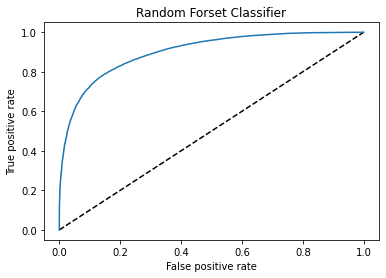

0.8161295024813792

In [126]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forset Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

OBS : ROC Curve : Classifiers that give curves closer to top left corner indicates that model will give better performance & if the
curve comming closer to 45 degree diagonal of the ROC space the less accurate the model will be, so in above case the curve is 
closer to top left corner hence I believe the model will give better performance.

# Exporting Model file with joblib library

In [127]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']